In [37]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Cargamos dataset iris
iris = load_iris()

In [39]:
# Crear DataFrame con las características
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [40]:
# Creamos la serie con las etiquetas
y = pd.Series(data=iris.target, name="target")

In [41]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [43]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [44]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [46]:
# Dividimos el conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state = 42
)

In [47]:
# Crear el modelo
knn_cv = KNeighborsClassifier(n_neighbors=3)

# Evaluar con validación cruzada (cv=5 particiones)
scores = cross_val_score(knn_cv, X, y, cv=5)

# Mostrar resultados
print("Precisión en cada partición:", scores)
print("Precisión media:", scores.mean())
print("Desviación estándar:", scores.std())

Precisión en cada partición: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Precisión media: 0.9666666666666668
Desviación estándar: 0.02108185106778919


In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Creamos el modelo con k=1
knn =KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [24]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Precisión del modelo: {accuracy:.2f}")
print(f"Tasa de error: {error_rate:.2f}")

Precisión del modelo: 1.00
Tasa de error: 0.00


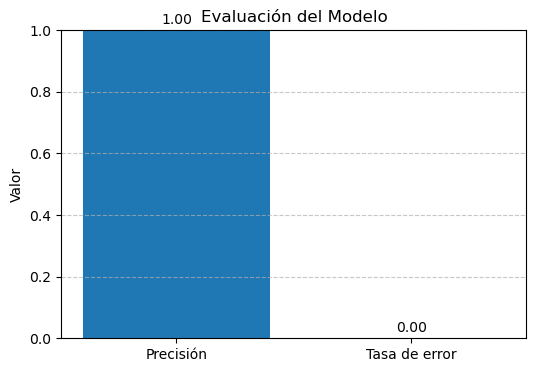

In [34]:
# Datos para graficar
metrics = ['Precisión', 'Tasa de error']
values = [accuracy, error_rate]

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Evaluación del Modelo')
plt.ylabel('Valor')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores encima de las barras
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

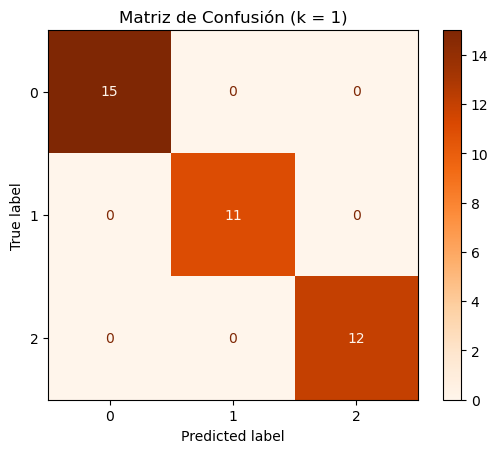

In [35]:
# Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Oranges")
disp.ax_.set_title(f"Matriz de Confusión (k = {knn.n_neighbors})")
plt.show()

# Conclusiones

### 1. El modelo generaliza muy bien:

Un 96.67% de precisión media indica que el modelo mantiene un rendimiento alto en diferentes particiones del dataset.

### 2. No hay overfitting:

Aunque sin validación cruzada el test dio 100%, la validación cruzada confirma que ese resultado no es por casualidad. Solo hay una ligera variación entre las particiones.

### 3. Estabilidad:

La desviación estándar es muy baja, lo que indica que el modelo es consistente en todos los subconjuntos del dataset.